
<font size="12">Lending Club Case Study</font>

Import all the required libraries to solve the problem.

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
loan = pd.read_csv("loan.csv")
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [153]:
loan.shape

(39717, 111)

Find the number of columns with no values

In [154]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

Remove all the columns having no values, since they will not have any impact on our investigation

In [155]:
loan.dropna(axis = 1, how = 'all', inplace = True)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [156]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

<font size="5">Data Analysis and Cleanup</font>

Remove the unnecessary personal details which in no way impacts our analysis

In [157]:
loan.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)

In [158]:
loan.shape

(39717, 30)

In [159]:
loan.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,83.70%,9,f,0.0,1,INDIVIDUAL,0,0,0.0,0.0
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,9.40%,4,f,0.0,1,INDIVIDUAL,0,0,0.0,0.0
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,98.50%,10,f,0.0,1,INDIVIDUAL,0,0,0.0,0.0
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,21%,37,f,0.0,1,INDIVIDUAL,0,0,0.0,0.0
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,53.90%,38,f,0.0,1,INDIVIDUAL,0,0,0.0,0.0


In [160]:
loan.describe()

,loan_amnt,funded_amnt_inv,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,total_acc,collections_12_mths_ex_med,policy_code,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39717.0,39020.000000,39678.0
mean,11219.443815,10397.448868,324.561922,6.896893e+04,13.315130,0.869200,9.294408,0.055065,22.088828,0.0,1.0,0.0,0.0,0.043260,0.0
std,7456.670694,7128.450439,208.874874,6.379377e+04,6.678594,1.070219,4.400282,0.237200,11.401709,0.0,0.0,0.0,0.0,0.204324,0.0
min,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,2.000000,0.0,1.0,0.0,0.0,0.000000,0.0
25%,5500.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,6.000000,0.000000,13.000000,0.0,1.0,0.0,0.0,0.000000,0.0
50%,10000.000000,8975.000000,280.220000,5.900000e+04,13.400000,1.000000,9.000000,0.000000,20.000000,0.0,1.0,0.0,0.0,0.000000,0.0
75%,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,1.000000,12.000000,0.000000,29.000000,0.0,1.0,0.0,0.0,0.000000,0.0
max,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,8.000000,44.000000,4.000000,90.000000,0.0,1.0,0.0,0.0,2.000000,0.0


Removing the columns which has single values and doesnt impact the analysis based on the above describe function

In [161]:
loan.drop(["acc_now_delinq","delinq_amnt","collections_12_mths_ex_med","tax_liens"],axis =1 ,inplace =True)
loan.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'initial_list_status',
       'policy_code', 'application_type', 'pub_rec_bankruptcies'],
      dtype='object')

Checking for missing values

In [162]:
(loan.isna().sum()/len(loan.index))*100

loan_amnt               0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
pymnt_plan              0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_util              0.125891
total_acc               0.000000
initial_list_status     0.000000
policy_code             0.000000
application_type        0.000000
pub_rec_bankruptcies    1.754916
dtype: float64

We have to handle the missing values for emp_length and revol_util and pub_rec_bankruptcies
1.Let us get the details of each of the column having missing values

In [163]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt_inv       39717 non-null  float64
 2   term                  39717 non-null  object 
 3   int_rate              39717 non-null  object 
 4   installment           39717 non-null  float64
 5   grade                 39717 non-null  object 
 6   sub_grade             39717 non-null  object 
 7   emp_length            38642 non-null  object 
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  issue_d               39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  pymnt_plan            39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  dti                

#Analysing DataType

Convert int_rate as float64, since it should not be an object

In [164]:
loan["int_rate"]=loan["int_rate"].apply(lambda x:x.replace("%",""))
loan["int_rate"]=loan["int_rate"].astype("float")

Convert emp_length  as float64, since it should not be an object

In [165]:
loan["emp_length"].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [166]:
loan = loan[~loan['emp_length'].isnull()]
import re
loan['emp_length'] = loan['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numeric
loan['emp_length'] = loan['emp_length'].apply(lambda x: pd.to_numeric(x))
loan["emp_length"].value_counts()

10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

Let us categorise the loan_status,based on default or not

In [167]:
loan["loan_status"].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

Since the loan status in current, is neither paid nor defaulted, so removing the current loan_status rows.

In [168]:
loan = loan[~(loan["loan_status"]=="Current")]
loan["loan_status"].value_counts()

Fully Paid     32145
Charged Off     5399
Name: loan_status, dtype: int64

In [169]:
loan["loan_status"] = loan["loan_status"].apply(lambda x:0 if x== "Fully Paid" else 1)

loan["loan_status"].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

<font size="5">Univariate Analysis</font>

Plotting loan_status with all categorical variables.
First ,let us get the list of categorical variables and then draw the plots

In [170]:
list(loan.select_dtypes(['object']).columns)

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'pymnt_plan',
 'purpose',
 'earliest_cr_line',
 'revol_util',
 'initial_list_status',
 'application_type']

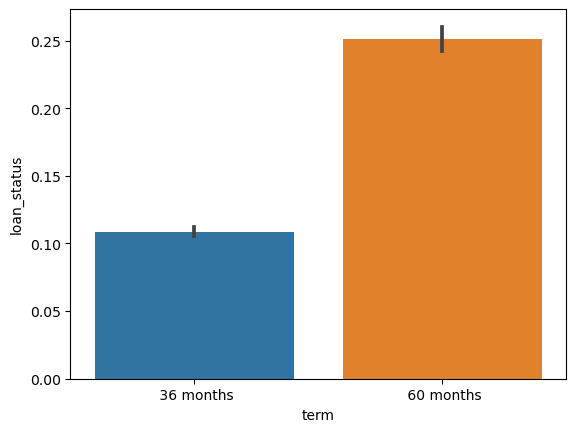

In [171]:
sns.barplot(x='term', y='loan_status', data=loan)
plt.show()

Based on the above plot, 60 months term has more default rate than 36 months

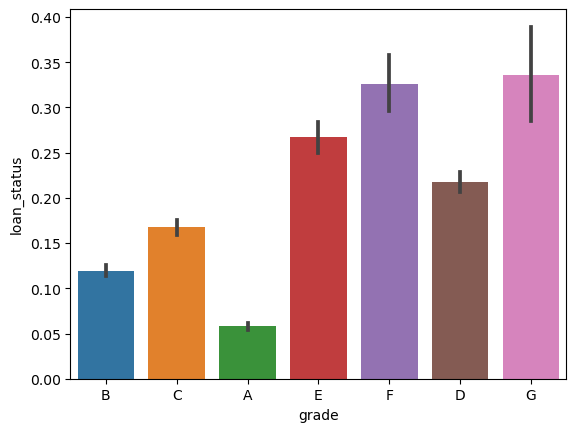

In [172]:


sns.barplot(x='grade', y='loan_status', data=loan)
plt.show()

With the increase in grade there is increase in Default rate

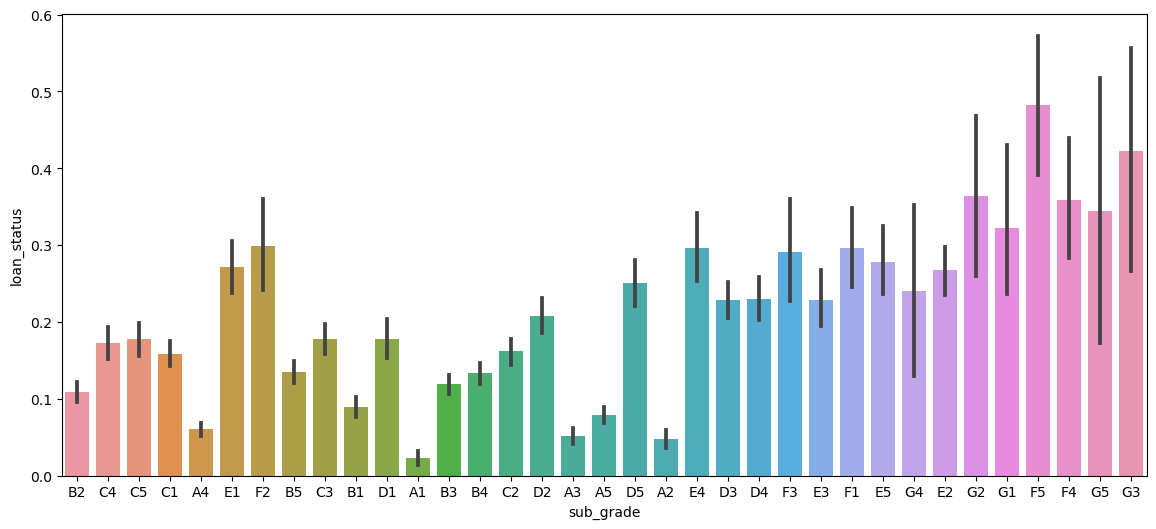

In [173]:
plt.figure(figsize=(14, 6))
sns.barplot(x='sub_grade', y='loan_status', data=loan)
plt.show()

With the increase in sub-grade more values of default rate

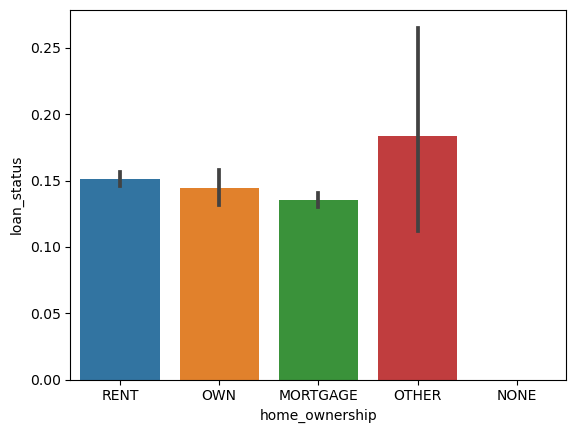

In [174]:
sns.barplot(x='home_ownership', y='loan_status', data=loan)
plt.show()

It is not having much effect on default rate

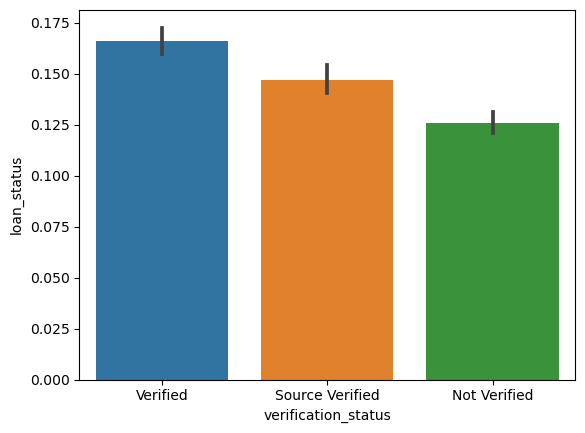

In [175]:
sns.barplot(x='verification_status', y='loan_status', data=loan)
plt.show()

If the loans are verified, more default rate

In [176]:
loan["issue_d"].value_counts()

Dec-11    1994
Nov-11    1971
Oct-11    1863
Sep-11    1837
Aug-11    1751
Jun-11    1675
Jul-11    1674
May-11    1554
Apr-11    1505
Mar-11    1402
Jan-11    1336
Feb-11    1239
Dec-10    1220
Nov-10    1096
Jul-10    1092
Oct-10    1086
Sep-10    1058
Aug-10    1058
Jun-10     996
May-10     894
Apr-10     806
Mar-10     718
Feb-10     605
Nov-09     602
Dec-09     598
Jan-10     585
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
May-08      71
Aug-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: issue_d, dtype: int64

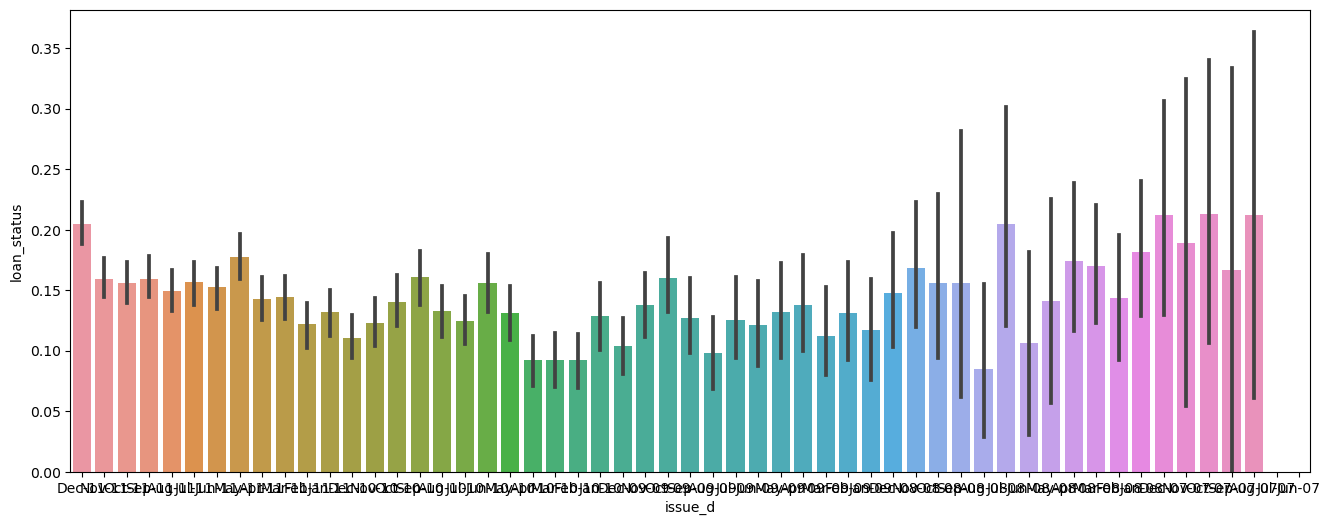

In [177]:
plt.figure(figsize=(16,6))
sns.barplot(x='issue_d', y='loan_status', data=loan)
plt.show()

Now,divide issue_d column based on month and year and then group by it, for better analysis

In [178]:
from datetime import datetime
loan['issue_d'] =loan['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))
loan['month'] = loan['issue_d'].apply(lambda x: x.month)
loan['year'] = loan['issue_d'].apply(lambda x: x.year)
loan.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_util,total_acc,initial_list_status,policy_code,application_type,pub_rec_bankruptcies,month,year
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,3,0,83.70%,9,f,1,INDIVIDUAL,0.0,12,2011
1,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000.0,...,3,0,9.40%,4,f,1,INDIVIDUAL,0.0,12,2011
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,2,0,98.50%,10,f,1,INDIVIDUAL,0.0,12,2011
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,10,0,21%,37,f,1,INDIVIDUAL,0.0,12,2011
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,9,0,28.30%,12,f,1,INDIVIDUAL,0.0,12,2011


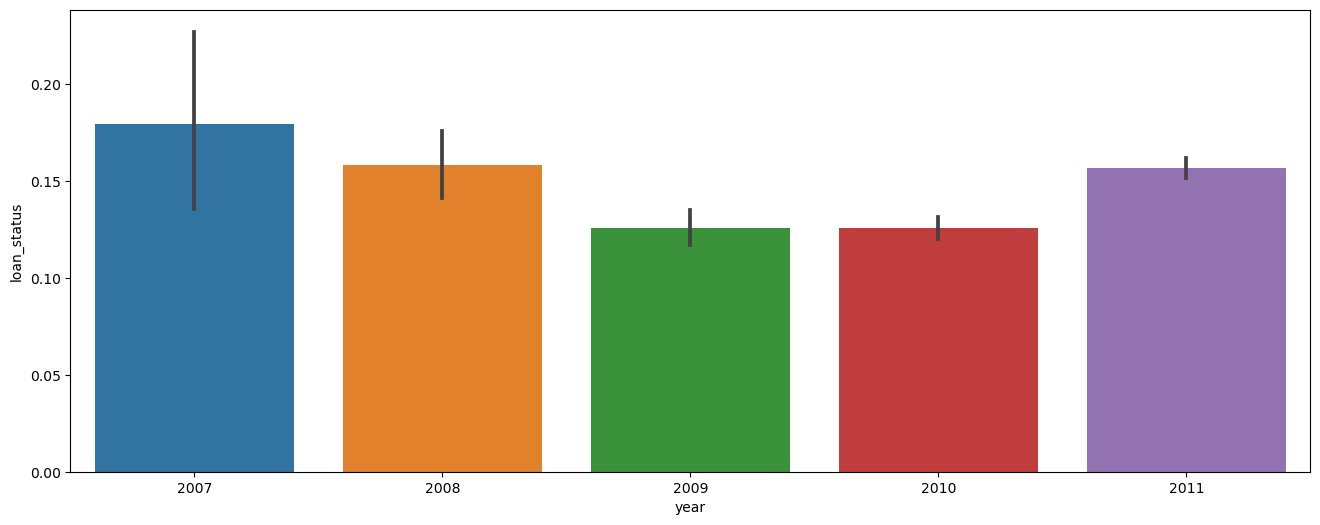

In [179]:
plt.figure(figsize=(16,6))
sns.barplot(x='year', y='loan_status', data=loan)
plt.show()

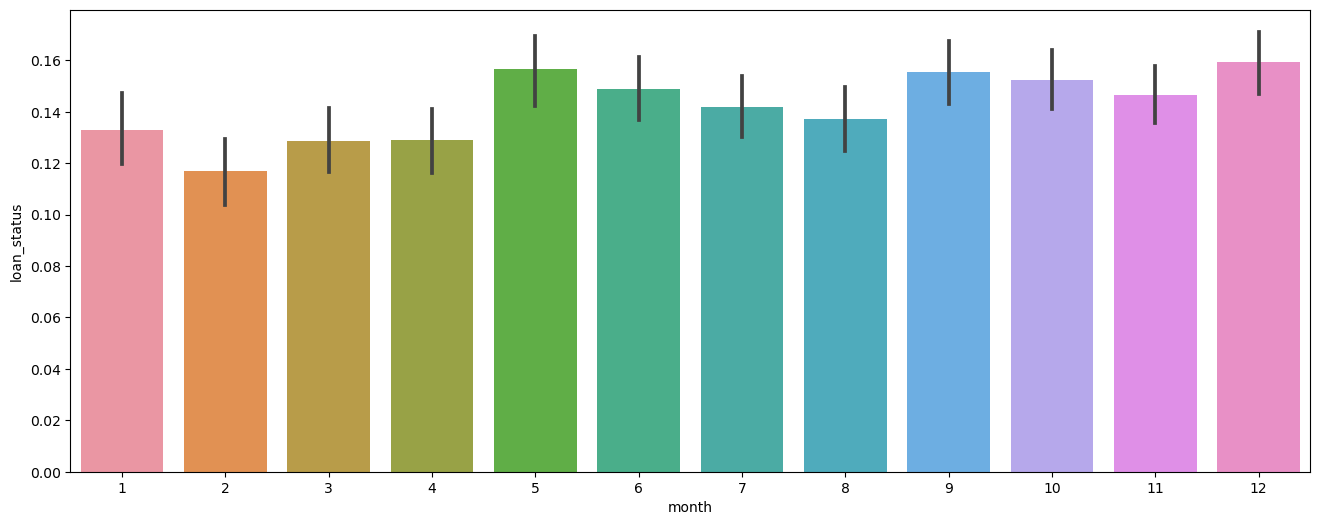

In [180]:
plt.figure(figsize=(16,6))
sns.barplot(x='month', y='loan_status', data=loan)
plt.show()

No particular trend in Months, but in years it decreased from 2007 to 2010 and then it suddenly increased in 2011.

In [181]:
loan["pymnt_plan"].value_counts()

n    37544
Name: pymnt_plan, dtype: int64

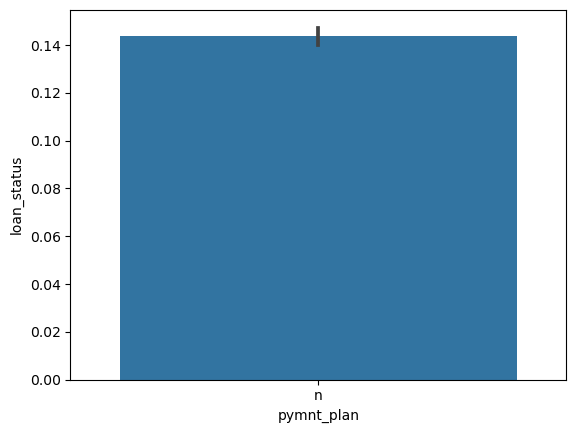

In [182]:
sns.barplot(x='pymnt_plan', y='loan_status', data=loan)
plt.show()

Since there is no impact, dropping of this column

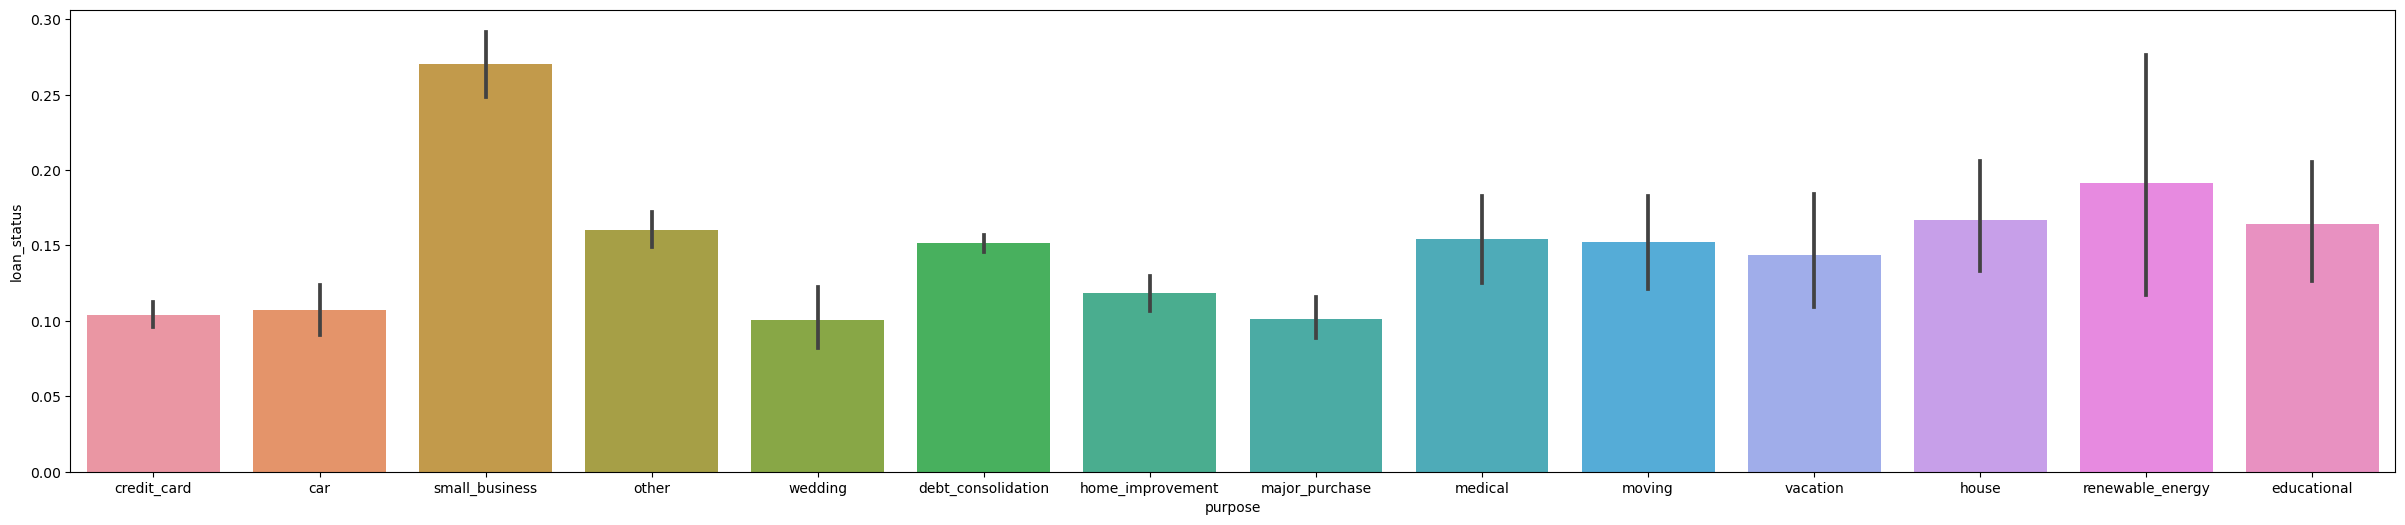

In [183]:
plt.figure(figsize=(30,6))
sns.barplot(x='purpose', y='loan_status', data=loan)
plt.show()

Small business default rate is more compared to others

In [184]:
loan["earliest_cr_line"].value_counts()

Oct-99    355
Nov-98    353
Oct-00    332
Dec-98    332
Nov-00    309
         ... 
Dec-65      1
Oct-70      1
Nov-72      1
Apr-66      1
Oct-08      1
Name: earliest_cr_line, Length: 514, dtype: int64

In [185]:
from datetime import datetime
loan['earliest_cr_line'] =loan['earliest_cr_line'].apply(lambda x: datetime.strptime(x, '%b-%y'))
loan['month_cr'] = loan['earliest_cr_line'].apply(lambda x: x.month)
loan['year_cr'] = loan['earliest_cr_line'].apply(lambda x: x.year)
loan.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,revol_util,total_acc,initial_list_status,policy_code,application_type,pub_rec_bankruptcies,month,year,month_cr,year_cr
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,83.70%,9,f,1,INDIVIDUAL,0.0,12,2011,1,1985
1,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000.0,...,9.40%,4,f,1,INDIVIDUAL,0.0,12,2011,4,1999
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,98.50%,10,f,1,INDIVIDUAL,0.0,12,2011,11,2001
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,21%,37,f,1,INDIVIDUAL,0.0,12,2011,2,1996
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,28.30%,12,f,1,INDIVIDUAL,0.0,12,2011,11,2004


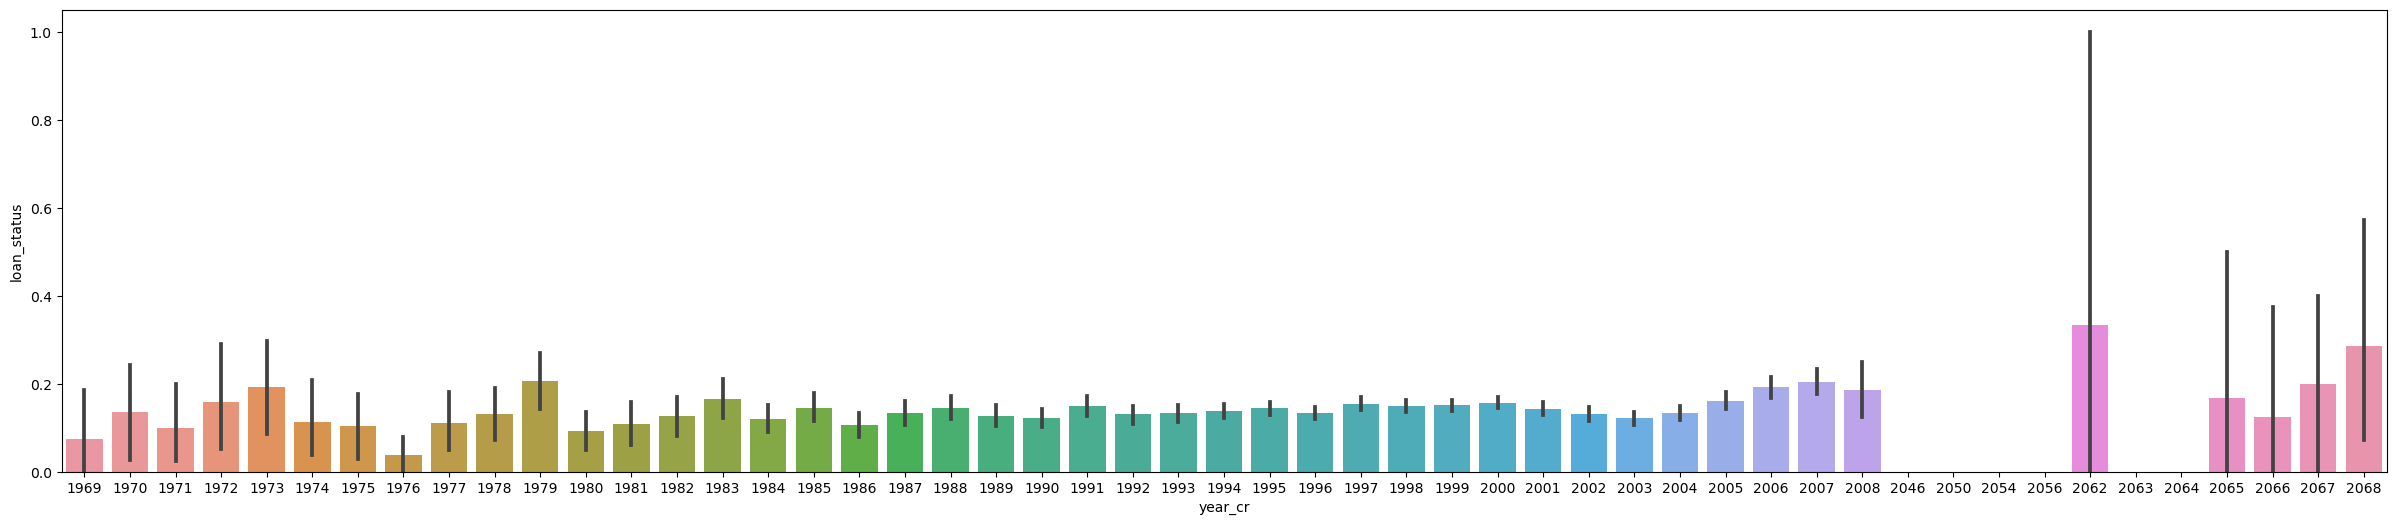

In [186]:
plt.figure(figsize=(30,6))
sns.barplot(x='year_cr', y='loan_status', data=loan)
plt.show()

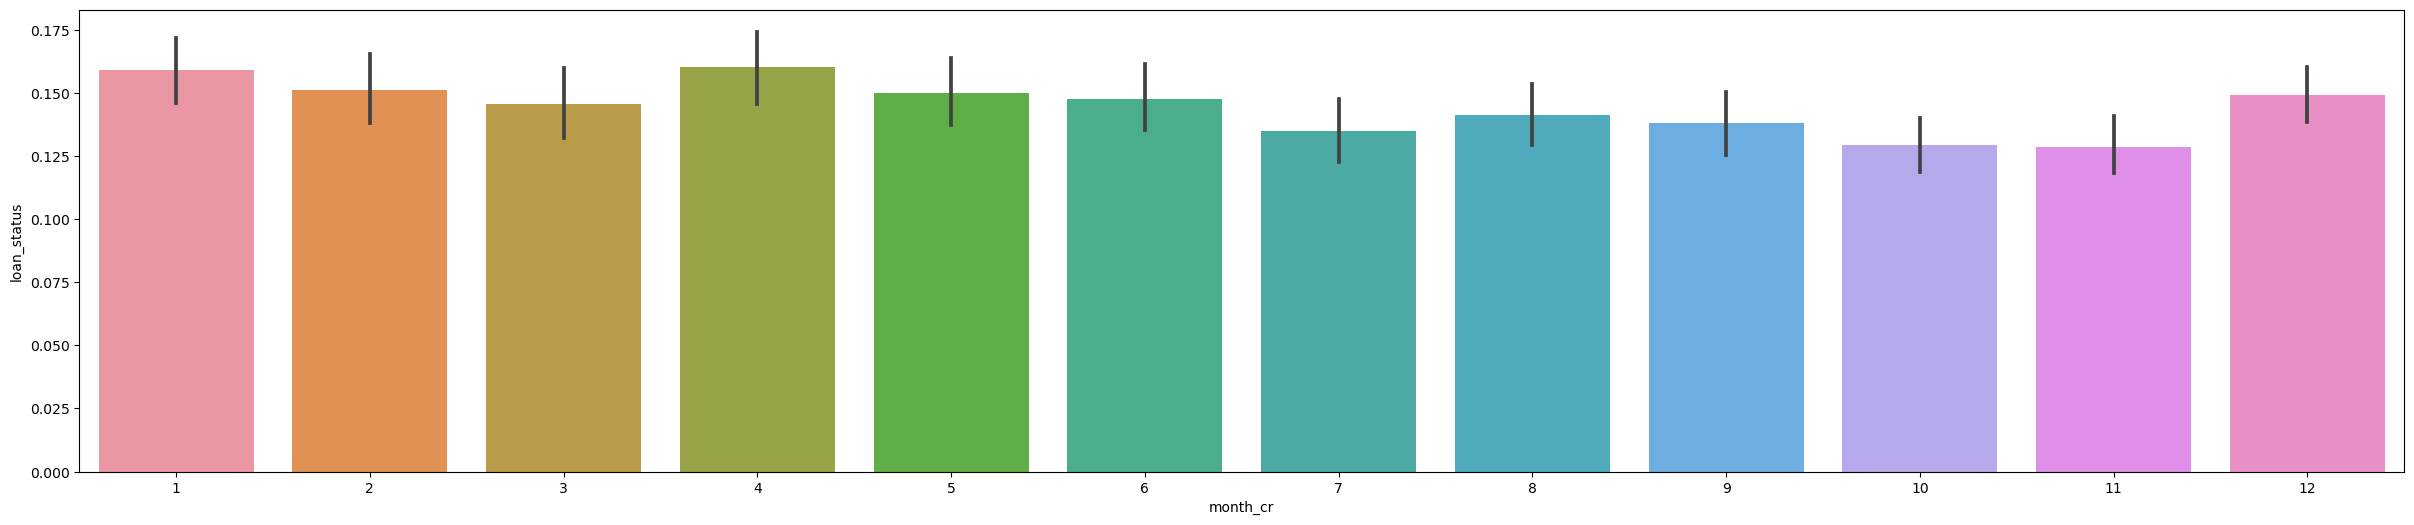

In [187]:
plt.figure(figsize=(30,6))
sns.barplot(x='month_cr', y='loan_status', data=loan)
plt.show()

There is no trend followed in both month and year of earliest_cr_line

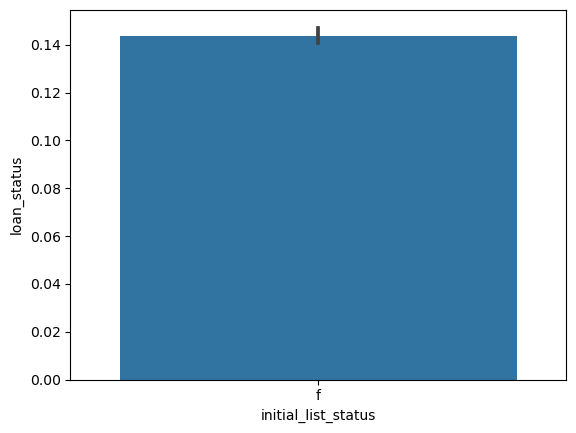

In [188]:
 
sns.barplot(x='initial_list_status', y='loan_status', data=loan)
plt.show()

There is no impact of initial_list_status on default rates

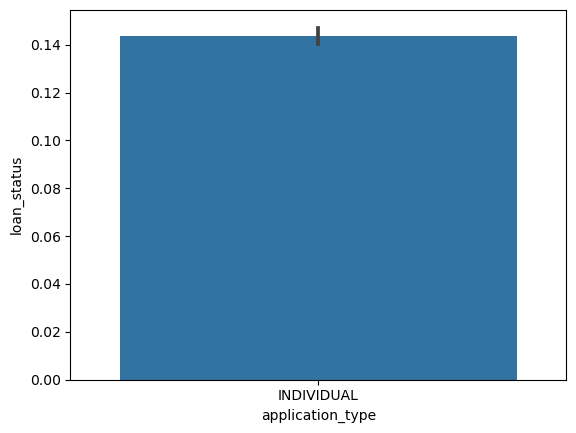

In [189]:
sns.barplot(x='application_type', y='loan_status', data=loan)
plt.show()

Now, Let us start analysing the continuous variables

In [193]:
list(loan.select_dtypes(['float','int']).columns)

['funded_amnt_inv',
 'int_rate',
 'installment',
 'emp_length',
 'annual_inc',
 'loan_status',
 'dti',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'total_acc',
 'policy_code',
 'pub_rec_bankruptcies',
 'month',
 'year',
 'month_cr',
 'year_cr']

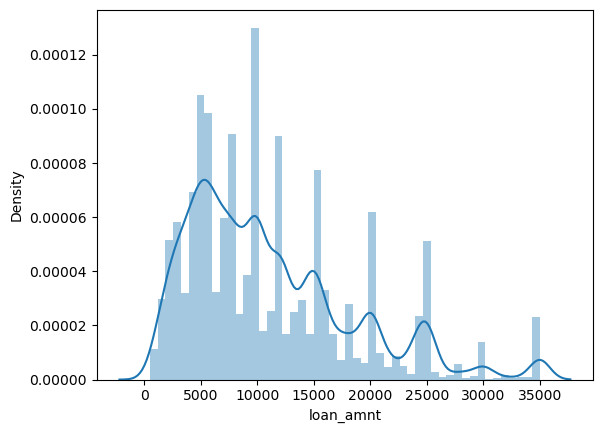

In [190]:
sns.distplot(loan['loan_amnt'])
plt.show()

 Loan_amount into bins

In [191]:
def loan_bins(value):
    if value < 5000:
        return 'low'
    elif value >=5000 and value < 15000:
        return 'medium'
    elif value >= 15000 and value < 25000:
        return 'high'
    else:
        return 'very high'
        
loan['loan_amnt'] = loan['loan_amnt'].apply(lambda x: loan_bins(x))

In [192]:
loan["loan_amnt"].value_counts()

medium       20157
high          7572
low           7095
very high     2720
Name: loan_amnt, dtype: int64

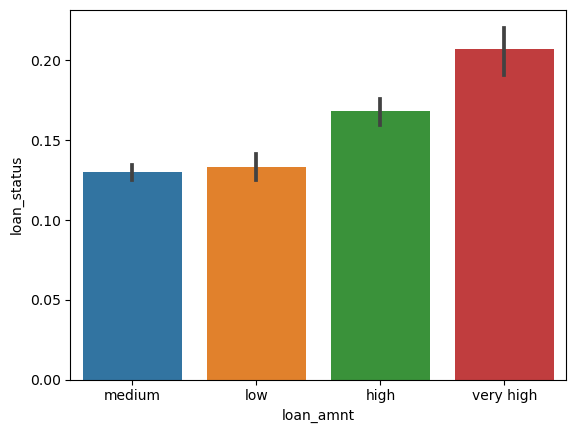

In [195]:
sns.barplot(x='loan_amnt', y='loan_status', data=loan)
plt.show()

The higher the loan amount, the higher the default rate

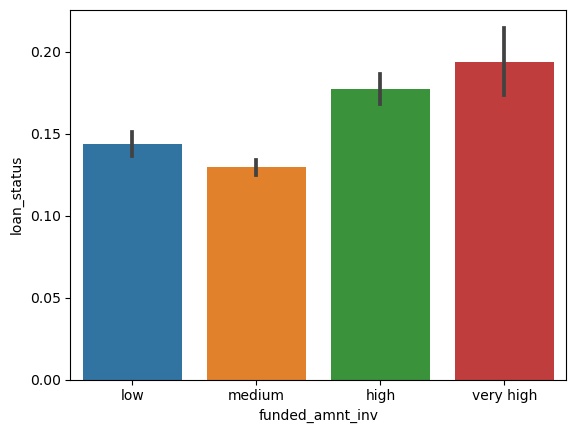

In [196]:
loan['funded_amnt_inv'] = loan['funded_amnt_inv'].apply(lambda x: loan_bins(x))
sns.barplot(x='funded_amnt_inv', y='loan_status', data=loan)
plt.show()

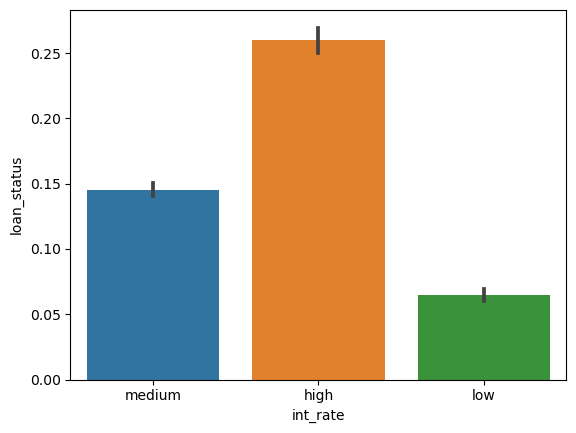

In [197]:
def int_rate_bin(value):
    if value <= 10:
        return 'low'
    elif value > 10 and value <=15:
        return 'medium'
    else:
        return 'high'
    
    
loan['int_rate'] = loan['int_rate'].apply(lambda x: int_rate_bin(x))
sns.barplot(x='int_rate', y='loan_status', data=loan)
plt.show()

Higher the interest rate, higher the default rate

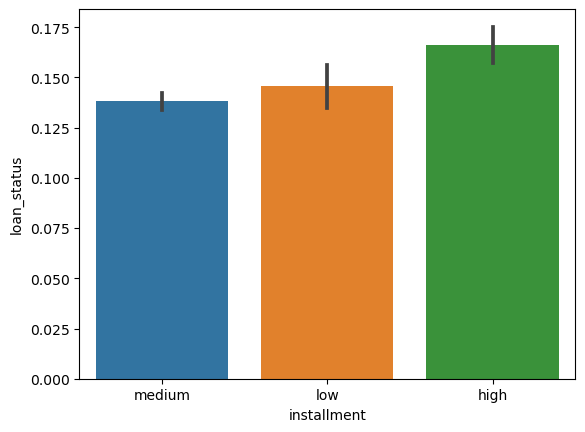

In [198]:
def installment_bin(value):
    if value <= 100:
        return 'low'
    elif value > 100 and value <=500:
        return 'medium'
    else:
        return 'high'
    
    
loan['installment'] = loan['installment'].apply(lambda x: installment_bin(x))
sns.barplot(x='installment', y='loan_status', data=loan)
plt.show()

Higher the installment, higher the default rate

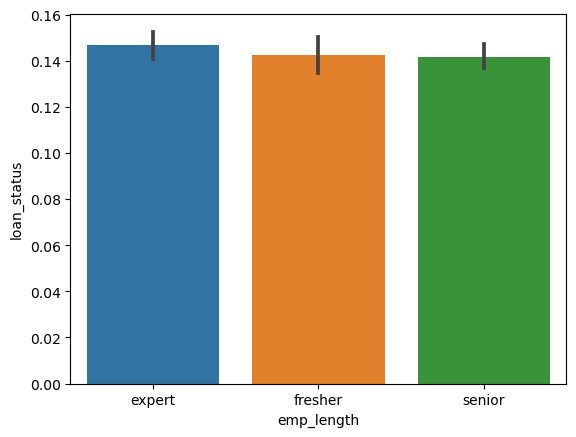

In [200]:
def emp_length_bin(value):
    if value <= 1:
        return 'fresher'
    elif value > 2 and value <=8:
        return 'senior'
    else:
        return 'expert'
    
    
loan['emp_length'] = loan['emp_length'].apply(lambda x: emp_length_bin(x))
sns.barplot(x='emp_length', y='loan_status', data=loan)
plt.show()

emp_length doesnot have much impact on analysis

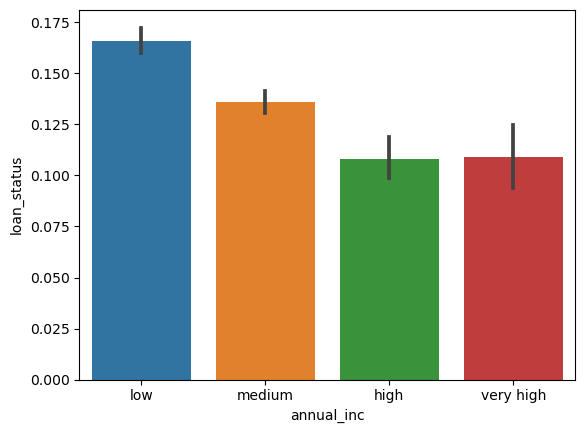

In [202]:
def annual_inc_bin(value):
    if value <= 50000:
        return 'low'
    elif value > 50000 and value <=100000:
        return 'medium'
    elif value > 100000 and value <=150000:
        return 'high'
    else:
        return 'very high'

loan['annual_inc'] = loan['annual_inc'].apply(lambda x: annual_inc_bin(x))
sns.barplot(x='annual_inc', y='loan_status', data=loan)
plt.show()

Lesser the annual income, higher the default rate

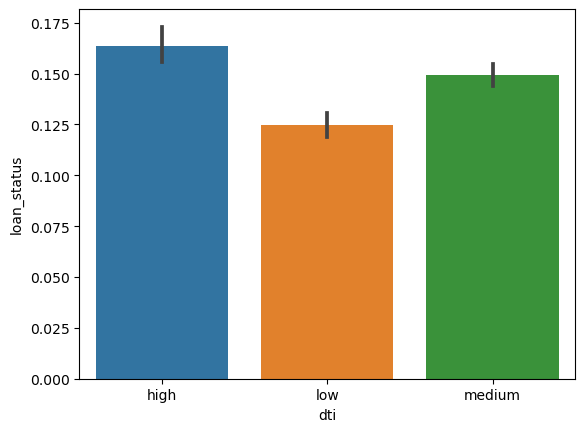

In [203]:

def dti_bin(value):
    if value <= 10:
        return 'low'
    elif value > 10 and value <=20:
        return 'medium'
    else:
        return 'high'
    

loan['dti'] = loan['dti'].apply(lambda x: dti_bin(x))
sns.barplot(x='dti', y='loan_status', data=loan)
plt.show()

Higher the debt to income ratio, higher the default rate

<font size="5">MultiVariate Analysis</font>

Annual income Vs Loan Purpose

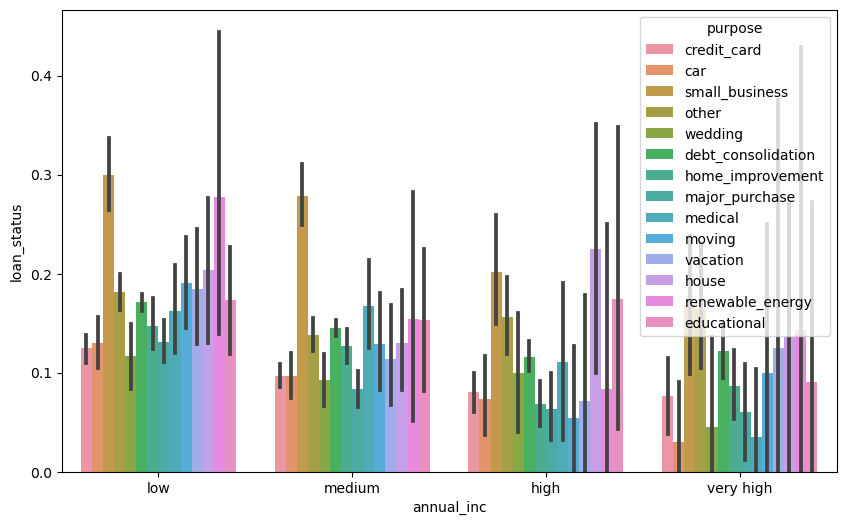

In [210]:
plt.figure(figsize=[10, 6])

sns.barplot(x='annual_inc', y="loan_status", hue='purpose', data=loan)
plt.show()

Considering only the top three purpose, and dropping off the others

In [211]:
chosenpurpose= ["credit_card","debt_consolidation","home_improvement"]
loan = loan[loan['purpose'].isin(chosenpurpose)]
loan['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
Name: purpose, dtype: int64

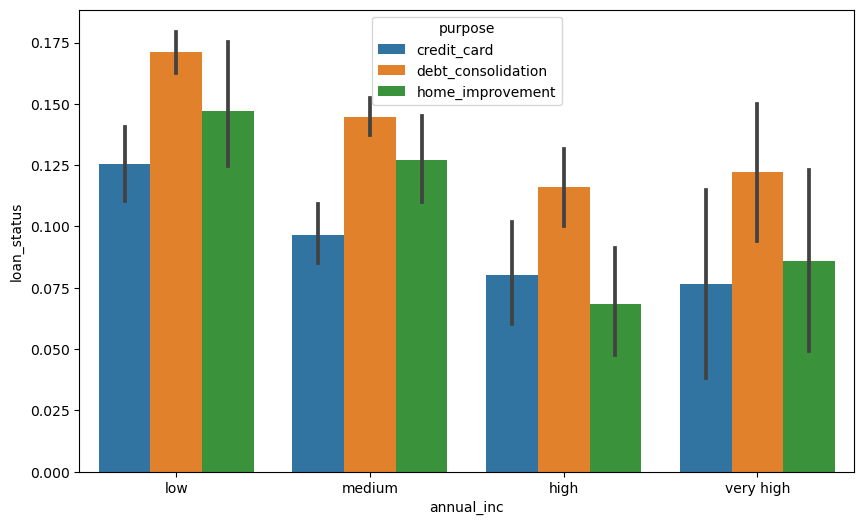

In [212]:
plt.figure(figsize=[10, 6])

sns.barplot(x='annual_inc', y="loan_status", hue='purpose', data=loan)
plt.show()

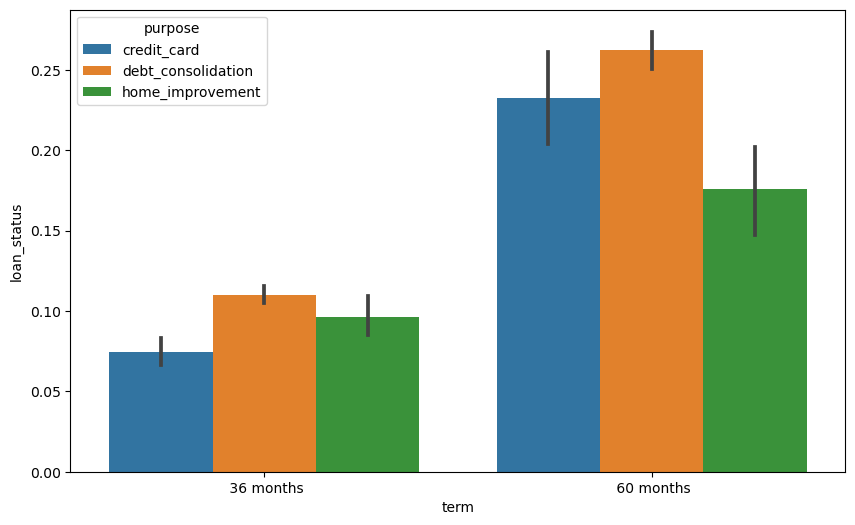

In [213]:
plt.figure(figsize=[10, 6])

sns.barplot(x='term', y="loan_status", hue='purpose', data=loan)
plt.show()

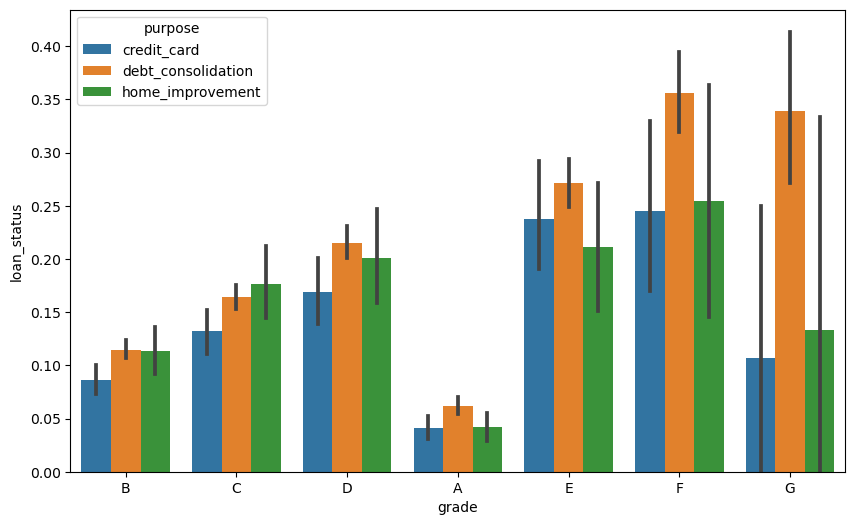

In [214]:
plt.figure(figsize=[10, 6])

sns.barplot(x='grade', y="loan_status", hue='purpose', data=loan)
plt.show()

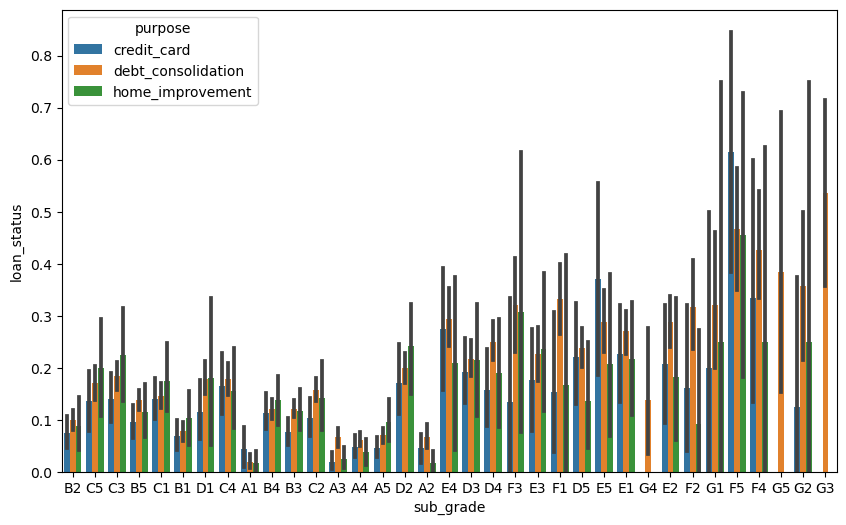

In [215]:
plt.figure(figsize=[10, 6])

sns.barplot(x='sub_grade', y="loan_status", hue='purpose', data=loan)
plt.show()

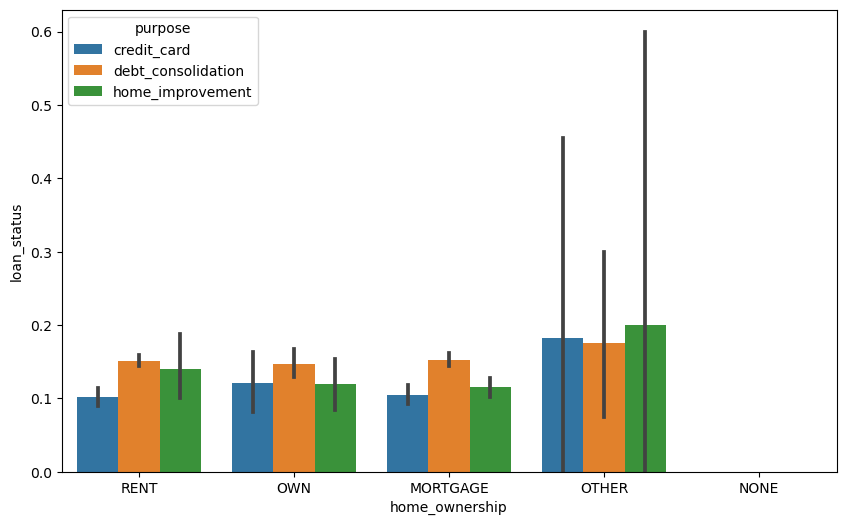

In [216]:
plt.figure(figsize=[10, 6])

sns.barplot(x='home_ownership', y="loan_status", hue='purpose', data=loan)
plt.show()

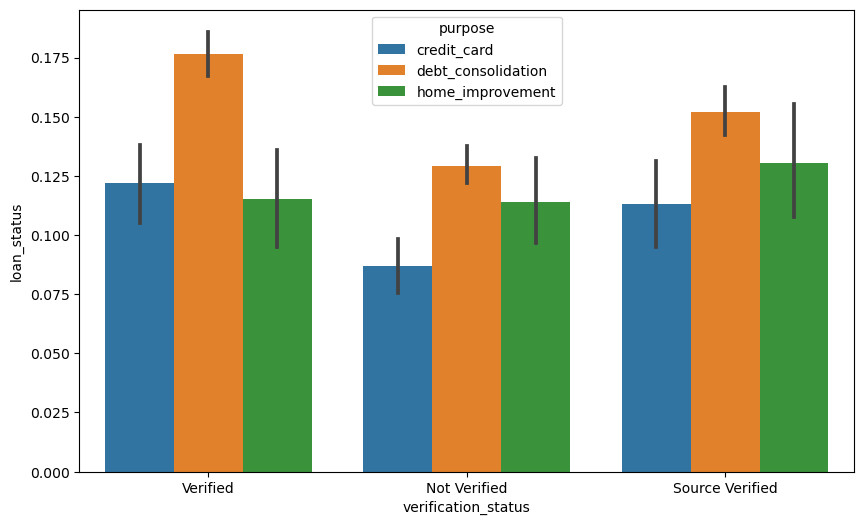

In [217]:
plt.figure(figsize=[10, 6])

sns.barplot(x='verification_status', y="loan_status", hue='purpose', data=loan)
plt.show()

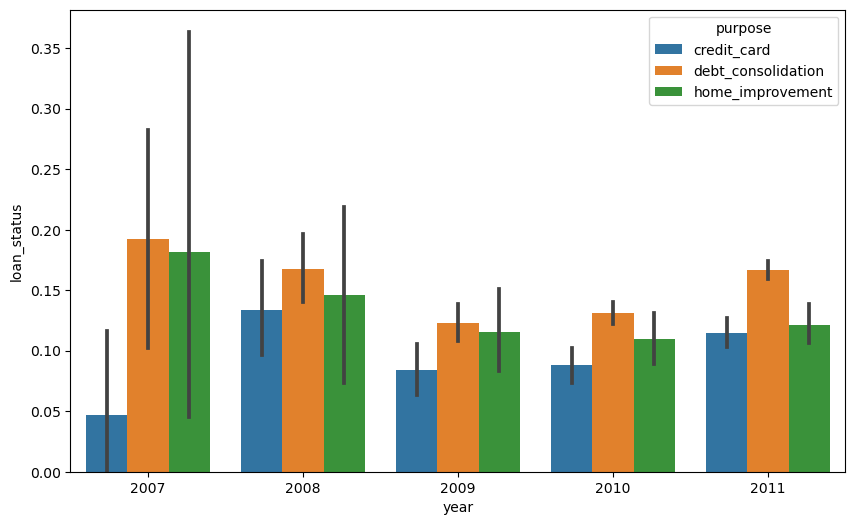

In [218]:
plt.figure(figsize=[10, 6])

sns.barplot(x='year', y="loan_status", hue='purpose', data=loan)
plt.show()

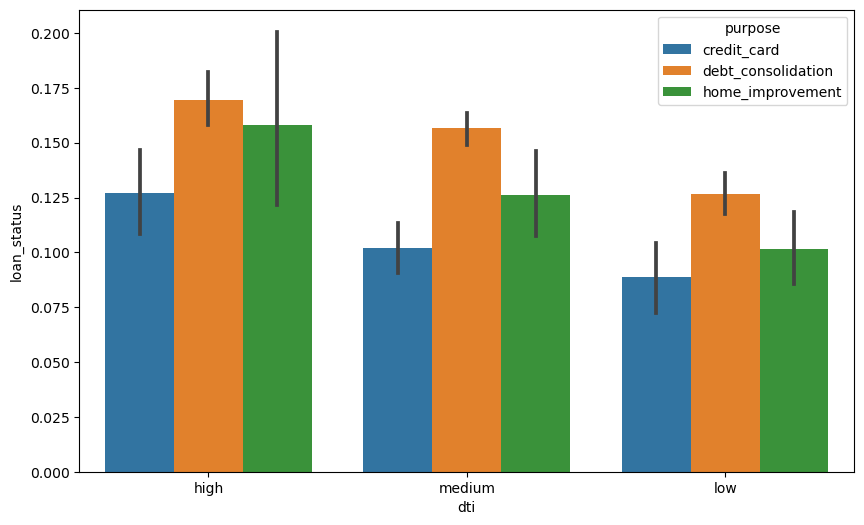

In [220]:
plt.figure(figsize=[10, 6])

sns.barplot(x='dti', y="loan_status", hue='purpose', data=loan)
plt.show()

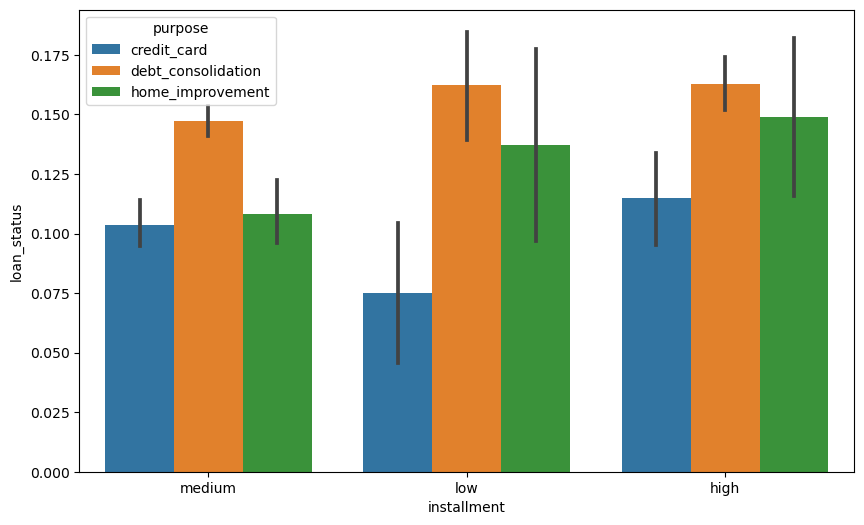

In [221]:
plt.figure(figsize=[10, 6])

sns.barplot(x='installment', y="loan_status", hue='purpose', data=loan)
plt.show()

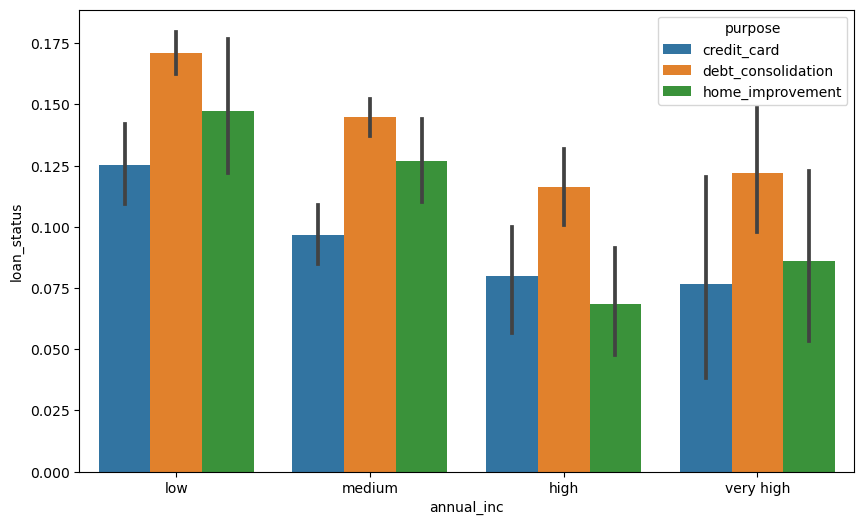

In [222]:
plt.figure(figsize=[10, 6])

sns.barplot(x='annual_inc', y="loan_status", hue='purpose', data=loan)
plt.show()

<font size="5">Final Observations</font>

* Debt_consolidation purpose has the highest default rate when checked with all the combinations
* 60 months term has more default rate than 36 months
* With the increase in grade there is increase in Default rate
* With the increase in sub-grade more values of default rate
* If the loans are verified, more default rate.
* No particular trend in Months, but in years it decreased from 2007 to 2010 and then it suddenly increased in 2011.
* Small business default rate is more compared to others
* The higher the loan amount, the higher the default rate
* Higher the interest rate, higher the default rate
* Higher the installment, higher the default rate
* Higher the debt to income ratio, higher the default rate
* Lesser the annual income, higher the default rate.